In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.datasets import load_breast_cancer

from numpy.random import seed
from tensorflow import set_random_seed

In [20]:
x,y = load_breast_cancer(return_X_y = True)
x = preprocessing.MinMaxScaler().fit_transform(x)
print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle = True, random_state=0)
n_features = x.shape[1]

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 

In [42]:
seed(0)
set_random_seed(0)

# defining the model
model = Sequential()
model.add(Dense(5, input_dim = n_features, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(3, activation='relu', kernel_initializer='random_uniform', bias_initializer='zeros'))
model.add(Dense(1, activation='sigmoid',kernel_initializer='random_uniform', bias_initializer='zeros'))

# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics = ['acc'])

# fit the model
history = model.fit(x_train, y_train, epochs=2000, batch_size=32,validation_data =(x_test,y_test), verbose=0)

In [43]:
loss, acc = model.evaluate(x_test, y_test)
print('Accuracy on test dataset: %.2f' % acc)
print('Loss: ', loss)

188/188 [==============================] - 0s 71us/step
Accuracy on test dataset: 0.94
Loss:  0.4776302201950804


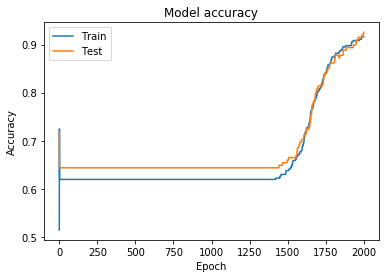

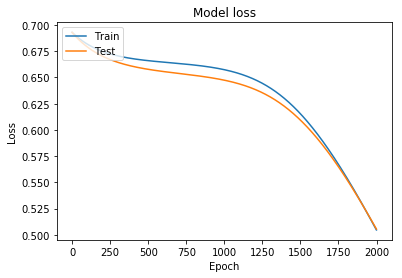

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
pred = model.predict(x_test)

for i in range(5):
    print(pred[i])

[0.6238395]
[0.6312653]
[0.6321076]
[0.6312491]
[0.6332286]
